In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Loading data

**Training data**

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

# load the MNIST dataset
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
X = train_data.iloc[:, train_data.columns != 'label'] 
y = train_data.iloc[:, train_data.columns == 'label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, \
    train_size=0.75, random_state = 0)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_test_ML = y_test
y_train_ML = y_train

In [3]:
# preprocess the data
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [4]:
# create a CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [5]:
# train the CNN model
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
197/197 [==============================] - 11s 8ms/step - loss: 2.0357 - accuracy: 0.8636 - val_loss: 0.1568 - val_accuracy: 0.9540
Epoch 2/10
197/197 [==============================] - 1s 7ms/step - loss: 0.1022 - accuracy: 0.9689 - val_loss: 0.1124 - val_accuracy: 0.9675
Epoch 3/10
197/197 [==============================] - 1s 6ms/step - loss: 0.0578 - accuracy: 0.9822 - val_loss: 0.1034 - val_accuracy: 0.9710
Epoch 4/10
197/197 [==============================] - 1s 6ms/step - loss: 0.0401 - accuracy: 0.9869 - val_loss: 0.0926 - val_accuracy: 0.9749
Epoch 5/10
197/197 [==============================] - 1s 6ms/step - loss: 0.0260 - accuracy: 0.9922 - val_loss: 0.0855 - val_accuracy: 0.9773
Epoch 6/10
197/197 [==============================] - 1s 6ms/step - loss: 0.0212 - accuracy: 0.9935 - val_loss: 0.0857 - val_accuracy: 0.9783
Epoch 7/10
197/197 [==============================] - 1s 7ms/step - loss: 0.0161 - accuracy: 0.9942 - val_loss: 0.1018 - val_accuracy: 0.9768
Epoch

In [6]:
# evaluate the CNN model
score = model.evaluate(X_test, y_test)
print("CNN accuracy:", score[1])

329/329 [==============================] - 1s 4ms/step - loss: 0.0900 - accuracy: 0.9824
CNN accuracy: 0.9823809266090393


In [7]:
# predict the test set labels using CNN
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

329/329 [==============================] - 1s 2ms/step


In [8]:
# compare with traditional ML methods
X_train_ml = X_train.reshape(X_train.shape[0], 28*28)
X_test_ml = X_test.reshape(X_test.shape[0], 28*28)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_ml, y_train_ML)
y_pred_knn = knn.predict(X_test_ml)
svm = SVC()
svm.fit(X_train_ml, y_train_ML)
y_pred_svm = svm.predict(X_test_ml)
dt = DecisionTreeClassifier()
dt.fit(X_train_ml, y_train_ML)
y_pred_dt = dt.predict(X_test_ml)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
# calculate the accuracy scores
acc_knn = accuracy_score(np.argmax(y_test, axis=1), y_pred_knn)
acc_svm = accuracy_score(np.argmax(y_test, axis=1), y_pred_svm)
acc_dt = accuracy_score(np.argmax(y_test, axis=1), y_pred_dt)
acc_cnn = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print("KNN accuracy:", acc_knn)
print("SVM accuracy:", acc_svm)
print("Decision Tree accuracy:", acc_dt)
print("CNN accuracy:", acc_cnn)

KNN accuracy: 0.9654285714285714
SVM accuracy: 0.9736190476190476
Decision Tree accuracy: 0.8551428571428571
CNN accuracy: 0.9823809523809524


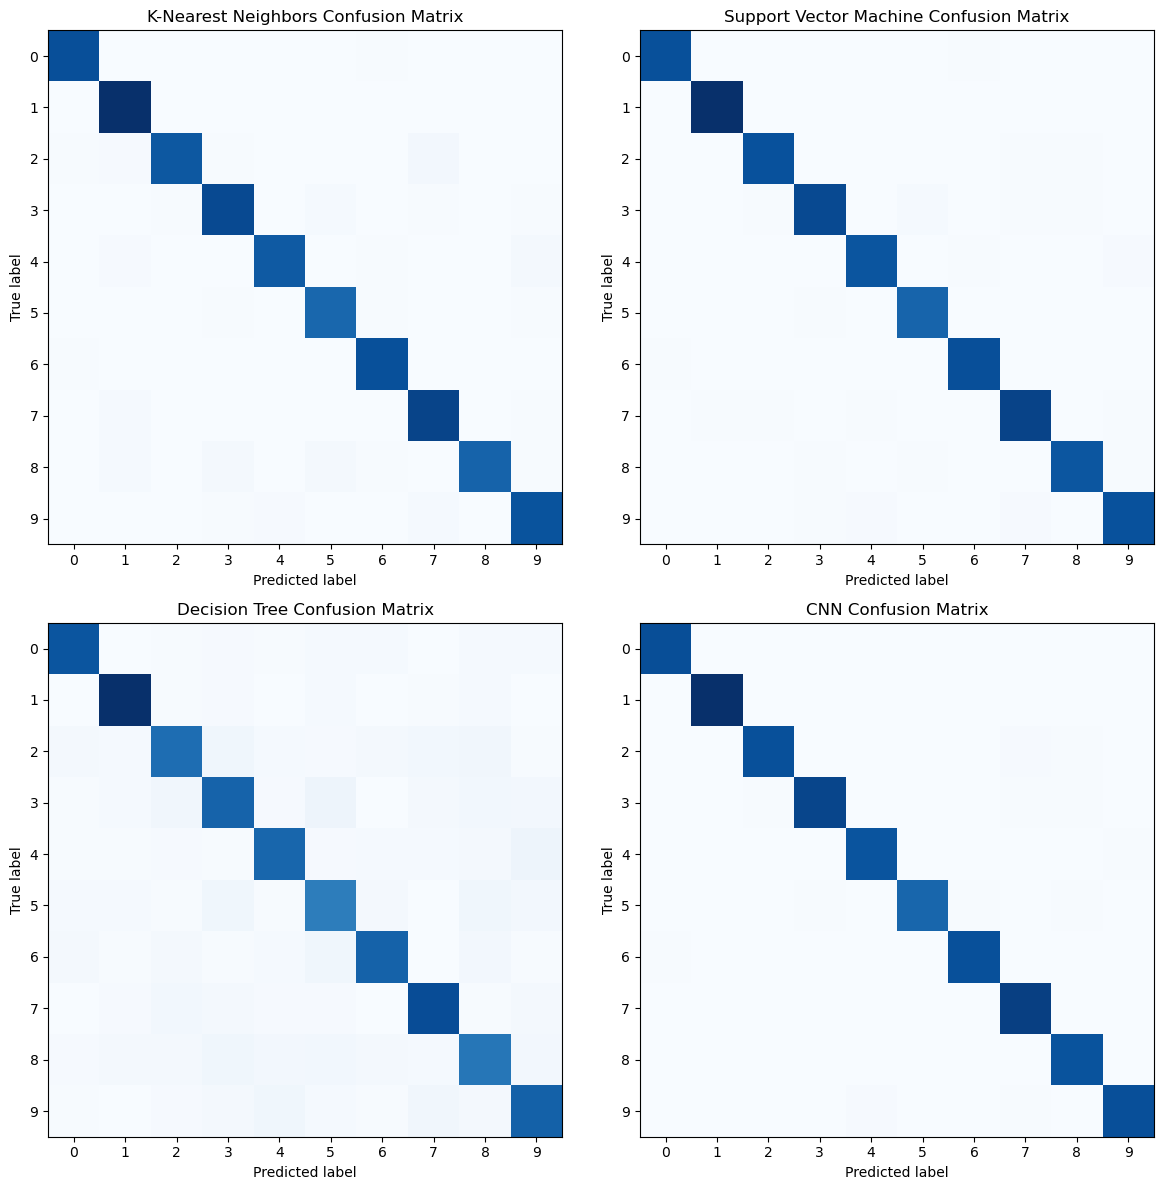

In [10]:
# plot the confusion matrices
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axes[0, 0].set_title("K-Nearest Neighbors Confusion Matrix")
axes[0, 1].set_title("Support Vector Machine Confusion Matrix")
axes[1, 0].set_title("Decision Tree Confusion Matrix")
axes[1, 1].set_title("CNN Confusion Matrix")
confmat_knn = confusion_matrix(np.argmax(y_test, axis=1), y_pred_knn)
confmat_svm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_svm)
confmat_dt = confusion_matrix(np.argmax(y_test, axis=1), y_pred_dt)
confmat_cnn = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
axes[0, 0].imshow(confmat_knn, cmap=plt.cm.Blues)
axes[0, 1].imshow(confmat_svm, cmap=plt.cm.Blues)
axes[1, 0].imshow(confmat_dt, cmap=plt.cm.Blues)
axes[1, 1].imshow(confmat_cnn, cmap=plt.cm.Blues)
for i in range(2):
    for j in range(2):
        axes[i, j].set_xticks(range(10))
        axes[i, j].set_yticks(range(10))
        axes[i, j].set_xlabel("Predicted label")
        axes[i, j].set_ylabel("True label")
plt.tight_layout()
plt.show()

In [11]:
X_test_sub = test_data.iloc[:, :]
X_test_sub = X_test_sub.values.reshape(X_test_sub.shape[0], 28, 28, 1)
y_pred_sub = model.predict(X_test_sub)
y_pred_sub = np.argmax(y_pred_sub, axis=1)
y_pred_sub = pd.Series(y_pred_sub,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred_sub],axis = 1)
submission.to_csv('submission.csv', index=False)

875/875 [==============================] - 2s 2ms/step
